In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"F:\cyber security project\mahesh\data\Train_data.csv")

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [5]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [7]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, class]
Index: []

[0 rows x 42 columns]


In [8]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(numeric_only = True))

<Axes: >

In [9]:
label_encoders = {}
mappings = {}

def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le
            mappings[col] = list(zip(le.classes_, le.transform(le.classes_)))
    return df, label_encoders, mappings

df_encoded, encoders, mappings = le(df)
separate_lists = {col: list(map(lambda x: f"{x[0]} == {x[1]}", mapping)) for col, mapping in mappings.items()}
print("\nSeparate lists for mappings:")
for col, mapping_list in separate_lists.items():
    print(f"{col} mappings:")
    print(mapping_list)


Separate lists for mappings:
protocol_type mappings:
['icmp == 0', 'tcp == 1', 'udp == 2']
service mappings:
['IRC == 0', 'X11 == 1', 'Z39_50 == 2', 'auth == 3', 'bgp == 4', 'courier == 5', 'csnet_ns == 6', 'ctf == 7', 'daytime == 8', 'discard == 9', 'domain == 10', 'domain_u == 11', 'echo == 12', 'eco_i == 13', 'ecr_i == 14', 'efs == 15', 'exec == 16', 'finger == 17', 'ftp == 18', 'ftp_data == 19', 'gopher == 20', 'hostnames == 21', 'http == 22', 'http_443 == 23', 'http_8001 == 24', 'imap4 == 25', 'iso_tsap == 26', 'klogin == 27', 'kshell == 28', 'ldap == 29', 'link == 30', 'login == 31', 'mtp == 32', 'name == 33', 'netbios_dgm == 34', 'netbios_ns == 35', 'netbios_ssn == 36', 'netstat == 37', 'nnsp == 38', 'nntp == 39', 'ntp_u == 40', 'other == 41', 'pm_dump == 42', 'pop_2 == 43', 'pop_3 == 44', 'printer == 45', 'private == 46', 'red_i == 47', 'remote_job == 48', 'rje == 49', 'shell == 50', 'smtp == 51', 'sql_net == 52', 'ssh == 53', 'sunrpc == 54', 'supdup == 55', 'systat == 56', 't

In [545]:
separate_lists['service']

['IRC == 0',
 'X11 == 1',
 'Z39_50 == 2',
 'auth == 3',
 'bgp == 4',
 'courier == 5',
 'csnet_ns == 6',
 'ctf == 7',
 'daytime == 8',
 'discard == 9',
 'domain == 10',
 'domain_u == 11',
 'echo == 12',
 'eco_i == 13',
 'ecr_i == 14',
 'efs == 15',
 'exec == 16',
 'finger == 17',
 'ftp == 18',
 'ftp_data == 19',
 'gopher == 20',
 'hostnames == 21',
 'http == 22',
 'http_443 == 23',
 'http_8001 == 24',
 'imap4 == 25',
 'iso_tsap == 26',
 'klogin == 27',
 'kshell == 28',
 'ldap == 29',
 'link == 30',
 'login == 31',
 'mtp == 32',
 'name == 33',
 'netbios_dgm == 34',
 'netbios_ns == 35',
 'netbios_ssn == 36',
 'netstat == 37',
 'nnsp == 38',
 'nntp == 39',
 'ntp_u == 40',
 'other == 41',
 'pm_dump == 42',
 'pop_2 == 43',
 'pop_3 == 44',
 'printer == 45',
 'private == 46',
 'red_i == 47',
 'remote_job == 48',
 'rje == 49',
 'shell == 50',
 'smtp == 51',
 'sql_net == 52',
 'ssh == 53',
 'sunrpc == 54',
 'supdup == 55',
 'systat == 56',
 'telnet == 57',
 'tim_i == 58',
 'time == 59',
 'urh_i 

#### Duration

In [11]:
df['duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25192 entries, 0 to 25191
Series name: duration
Non-Null Count  Dtype
--------------  -----
25192 non-null  int64
dtypes: int64(1)
memory usage: 196.9 KB


In [12]:
df['duration'].describe()

count    25192.000000
mean       305.054104
std       2686.555640
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      42862.000000
Name: duration, dtype: float64

<Axes: ylabel='duration'>

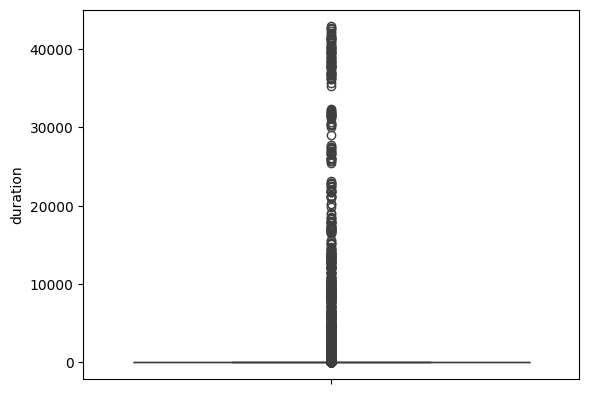

In [13]:
sns.boxplot(df['duration'])

In [14]:
q1=df['duration'].quantile(0.25)
q2=df['duration'].quantile(0.50)
q3=df['duration'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


### protocol_type	

In [16]:
df['protocol_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25192 entries, 0 to 25191
Series name: protocol_type
Non-Null Count  Dtype
--------------  -----
25192 non-null  int32
dtypes: int32(1)
memory usage: 98.5 KB


In [17]:
df['protocol_type'].unique()

array([1, 2, 0])

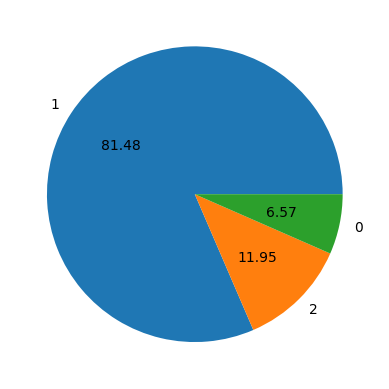

In [18]:
plt.pie(df['protocol_type'].value_counts(),labels=[1,2,0], autopct='%0.2f')
plt.show()

In [19]:
df['protocol_type'].value_counts()

protocol_type
1    20526
2     3011
0     1655
Name: count, dtype: int64

#### service

In [21]:
df['service'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25192 entries, 0 to 25191
Series name: service
Non-Null Count  Dtype
--------------  -----
25192 non-null  int32
dtypes: int32(1)
memory usage: 98.5 KB


In [22]:
df['service'].isna().sum()

0

In [23]:
df['service'].describe()

count    25192.000000
mean        29.039139
std         15.555601
min          0.000000
25%         19.000000
50%         22.000000
75%         46.000000
max         65.000000
Name: service, dtype: float64

<Axes: ylabel='service'>

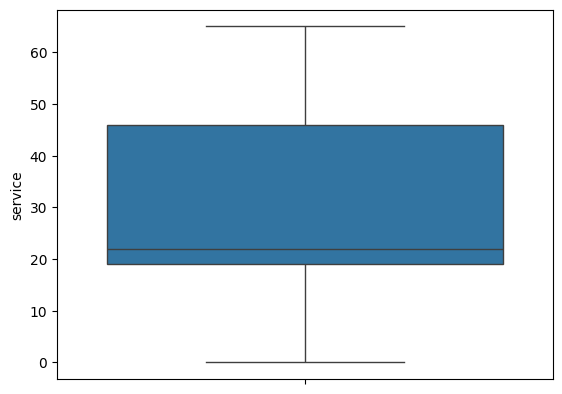

In [24]:
sns.boxplot(df['service'])

#### flag

In [26]:
df['flag'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25192 entries, 0 to 25191
Series name: flag
Non-Null Count  Dtype
--------------  -----
25192 non-null  int32
dtypes: int32(1)
memory usage: 98.5 KB


In [27]:
df['flag'].describe()

count    25192.000000
mean         6.982455
std          2.679322
min          0.000000
25%          5.000000
50%          9.000000
75%          9.000000
max         10.000000
Name: flag, dtype: float64

<Axes: ylabel='flag'>

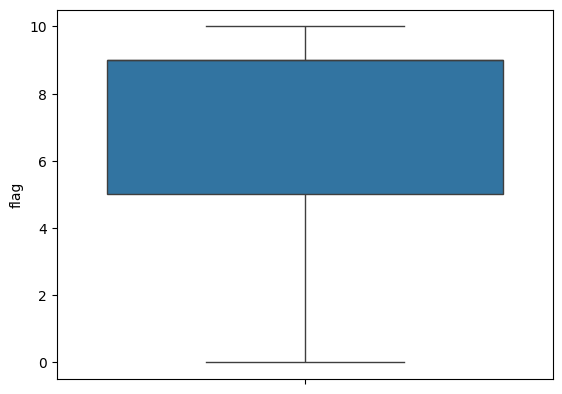

In [28]:
sns.boxplot(df['flag'])

#### src_bytes

In [30]:
df['src_bytes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25192 entries, 0 to 25191
Series name: src_bytes
Non-Null Count  Dtype
--------------  -----
25192 non-null  int64
dtypes: int64(1)
memory usage: 196.9 KB


In [31]:
df['src_bytes'].describe()

count    2.519200e+04
mean     2.433063e+04
std      2.410805e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.790000e+02
max      3.817091e+08
Name: src_bytes, dtype: float64

<Axes: ylabel='src_bytes'>

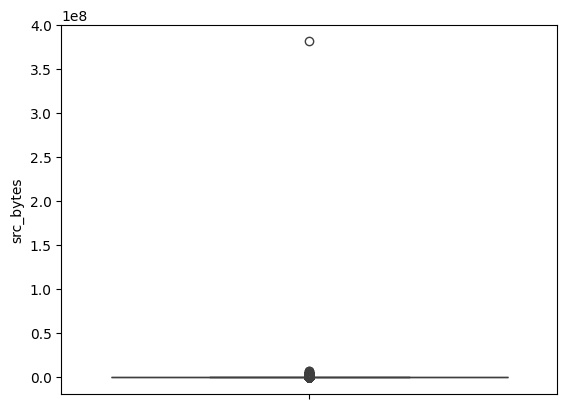

In [32]:
sns.boxplot(df['src_bytes'])

In [33]:
q1=df['src_bytes'].quantile(0.25)
q2=df['src_bytes'].quantile(0.50)
q3=df['src_bytes'].quantile(0.75)

iqr = q3-q1
print(iqr)
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

279.0
697.5
-418.5


In [34]:
df['src_bytes'] = np.where(df['src_bytes'] <lower_limit,lower_limit, df['src_bytes'])

In [35]:
df['src_bytes'] = np.where(df['src_bytes'] > upper_limit,upper_limit, df['src_bytes'])

<Axes: ylabel='src_bytes'>

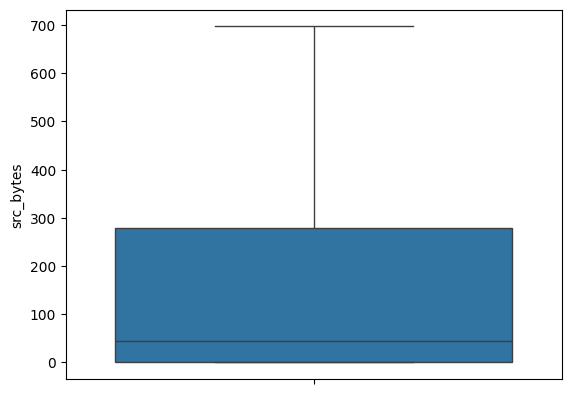

In [36]:
sns.boxplot(df['src_bytes'])

#### dst_bytes

In [38]:
df['dst_bytes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25192 entries, 0 to 25191
Series name: dst_bytes
Non-Null Count  Dtype
--------------  -----
25192 non-null  int64
dtypes: int64(1)
memory usage: 196.9 KB


In [39]:
df['dst_bytes'].describe()

count    2.519200e+04
mean     3.491847e+03
std      8.883072e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.302500e+02
max      5.151385e+06
Name: dst_bytes, dtype: float64

In [40]:
df['dst_bytes'].skew()

54.777576214208075

<Axes: xlabel='dst_bytes', ylabel='Density'>

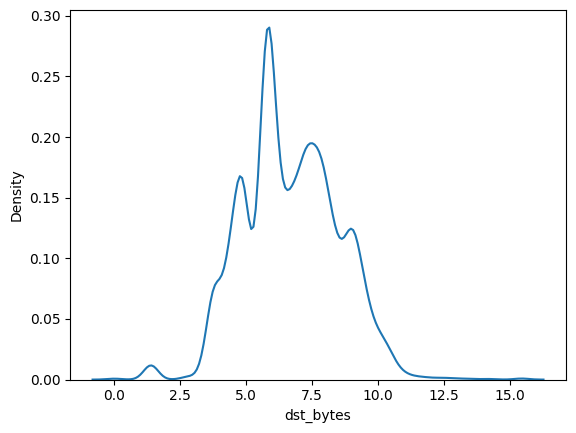

In [41]:
sns.kdeplot(np.log(df['dst_bytes']))

In [42]:
q1=df['dst_bytes'].quantile(0.25)
q2=df['dst_bytes'].quantile(0.50)
q3=df['dst_bytes'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

1325.625
-795.375


In [43]:
iqr

530.25

In [44]:
q1

0.0

In [45]:
q2

0.0

In [46]:
q3

530.25

In [47]:
df['dst_bytes'] = np.where(df['dst_bytes'] >= upper_limit,upper_limit,df['src_bytes'])

<Axes: xlabel='dst_bytes', ylabel='Density'>

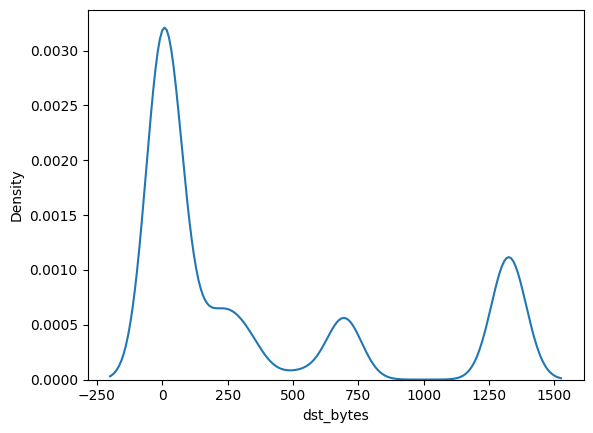

In [48]:
sns.kdeplot(df['dst_bytes'])

<Axes: ylabel='dst_bytes'>

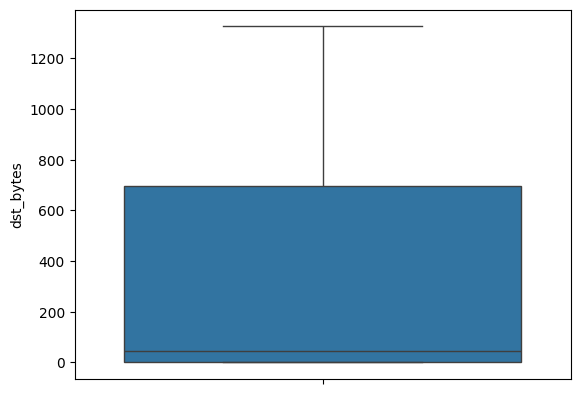

In [49]:
sns.boxplot(df['dst_bytes'])

In [50]:
df.columns.to_list()

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'class']

#### LAND

In [52]:
df['land'].value_counts()

land
0    25190
1        2
Name: count, dtype: int64

In [53]:
df['land'].corr(df['class'])

-0.0006048050628642442

#### 'wrong_fragment',

In [55]:
df['wrong_fragment'].value_counts()

wrong_fragment
0    24968
3      187
1       37
Name: count, dtype: int64

In [56]:
df['wrong_fragment'].corr(df['class'])

-0.09762491145466098

In [57]:
q1=df['wrong_fragment'].quantile(0.25)
q2=df['wrong_fragment'].quantile(0.50)
q3=df['wrong_fragment'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


<Axes: ylabel='wrong_fragment'>

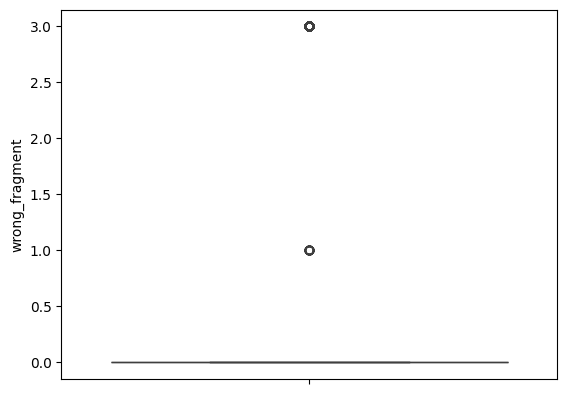

In [58]:
sns.boxplot(df['wrong_fragment'])

### 'urgent'

In [60]:
df['urgent'].value_counts()

urgent
0    25191
1        1
Name: count, dtype: int64

### 'hot'

In [62]:
df['hot'].value_counts()

hot
0     24672
2       200
1        78
30       55
28       52
4        37
6        26
5        17
22       13
24        9
19        8
3         7
18        6
14        3
7         2
15        1
25        1
77        1
17        1
11        1
20        1
12        1
Name: count, dtype: int64

<Axes: ylabel='hot'>

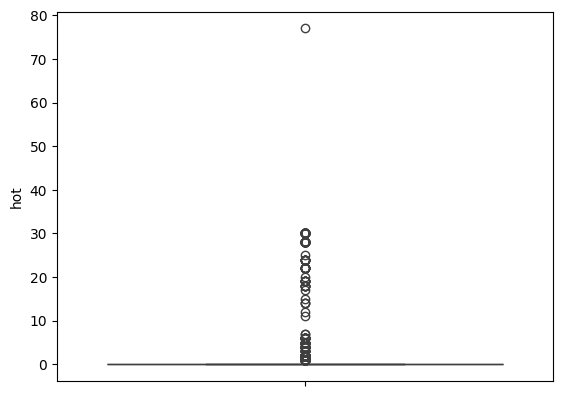

In [63]:
sns.boxplot(df['hot'])

In [64]:
q1=df['hot'].quantile(0.25)
q2=df['hot'].quantile(0.50)
q3=df['hot'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


#### 'num_failed_logins',

In [66]:
df['num_failed_logins'].value_counts()

num_failed_logins
0    25169
1       19
2        2
3        1
4        1
Name: count, dtype: int64

<Axes: ylabel='num_failed_logins'>

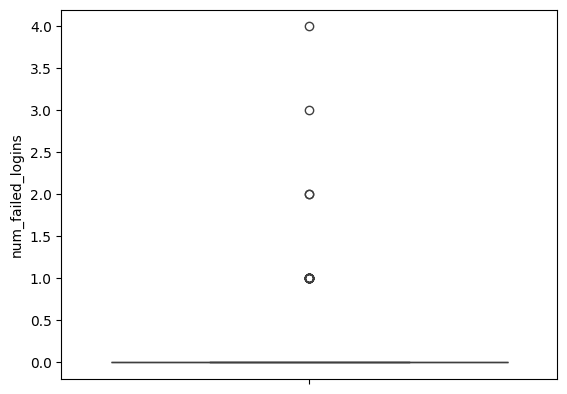

In [67]:
sns.boxplot(df['num_failed_logins'])

In [68]:
q1=df['num_failed_logins'].quantile(0.25)
q2=df['num_failed_logins'].quantile(0.50)
q3=df['num_failed_logins'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


#### 'logged_in',

In [70]:
df['logged_in'].value_counts()

logged_in
0    15247
1     9945
Name: count, dtype: int64

<Axes: ylabel='logged_in'>

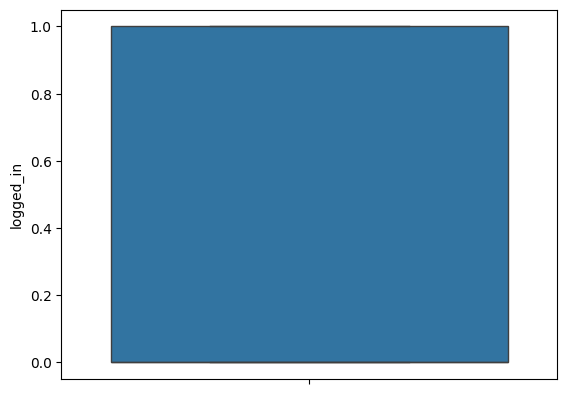

In [71]:
sns.boxplot(df['logged_in'])

<Axes: xlabel='logged_in', ylabel='Density'>

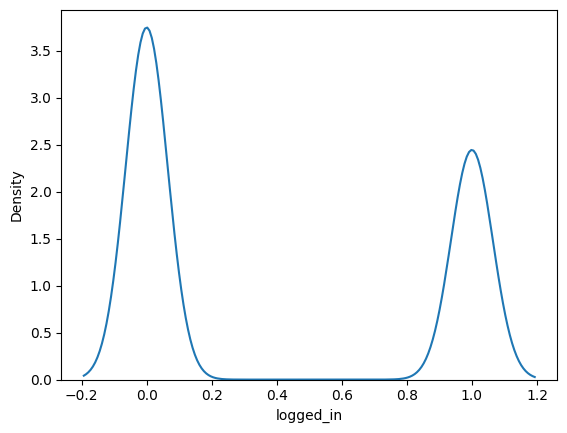

In [72]:
sns.kdeplot(df['logged_in'])

In [73]:
q1=df['logged_in'].quantile(0.25)
q2=df['logged_in'].quantile(0.50)
q3=df['logged_in'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

2.5
-1.5


In [74]:
df['logged_in'].median()

0.0

In [75]:
df['logged_in'] = np.where(df['logged_in'] >= upper_limit,upper_limit,df['logged_in'])

<Axes: xlabel='logged_in', ylabel='Density'>

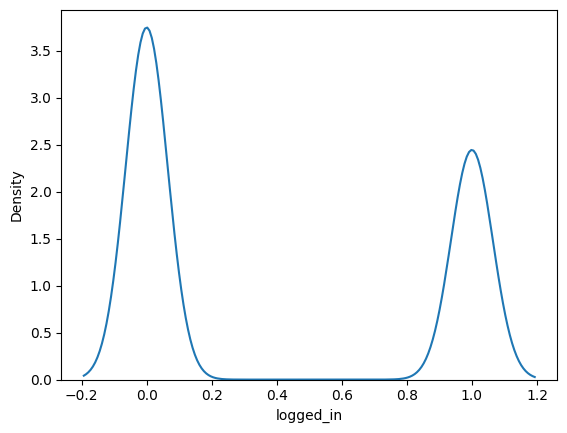

In [76]:
sns.kdeplot(df['logged_in'])

<Axes: ylabel='logged_in'>

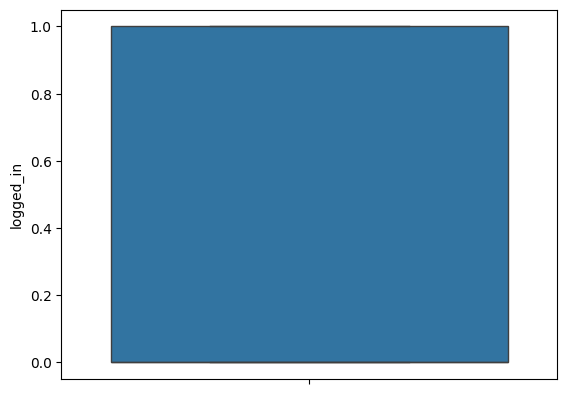

In [77]:
sns.boxplot(df['logged_in'])

#### 'num_compromised',

In [79]:
df['num_compromised'].value_counts()

num_compromised
0      24920
1        194
2         21
4         13
6          8
3          7
5          5
7          2
151        2
12         2
83         1
558        1
789        1
520        1
884        1
217        1
371        1
193        1
31         1
13         1
157        1
9          1
110        1
462        1
107        1
38         1
19         1
457        1
Name: count, dtype: int64

<Axes: ylabel='num_compromised'>

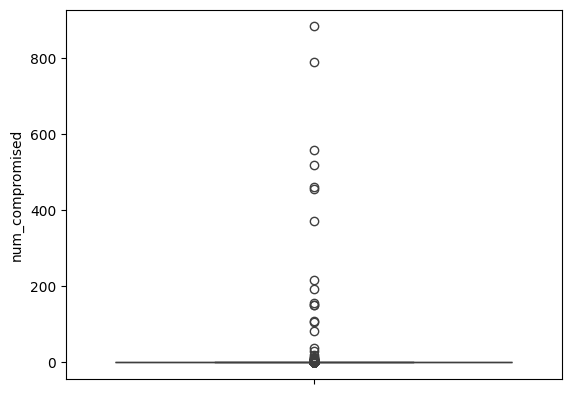

In [80]:
sns.boxplot(df['num_compromised'])

In [81]:
q1=df['num_compromised'].quantile(0.25)
q2=df['num_compromised'].quantile(0.50)
q3=df['num_compromised'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


#### 'root_shell',

In [83]:
df['root_shell'].value_counts()

root_shell
0    25153
1       39
Name: count, dtype: int64

<Axes: ylabel='root_shell'>

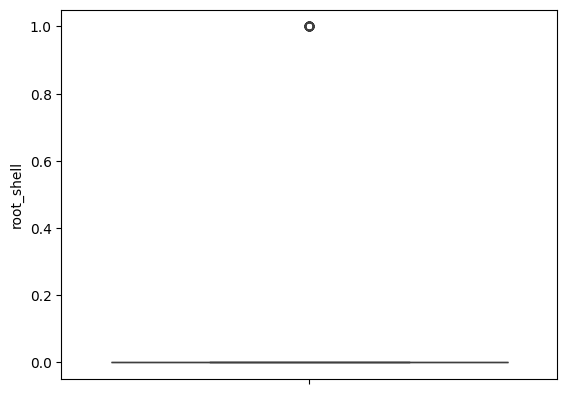

In [84]:
sns.boxplot(df['root_shell'])

In [85]:
q1=df['root_shell'].quantile(0.25)
q2=df['root_shell'].quantile(0.50)
q3=df['root_shell'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


### 'su_attempted

In [87]:
df['su_attempted'].value_counts()

su_attempted
0    25171
2       13
1        8
Name: count, dtype: int64

<Axes: ylabel='su_attempted'>

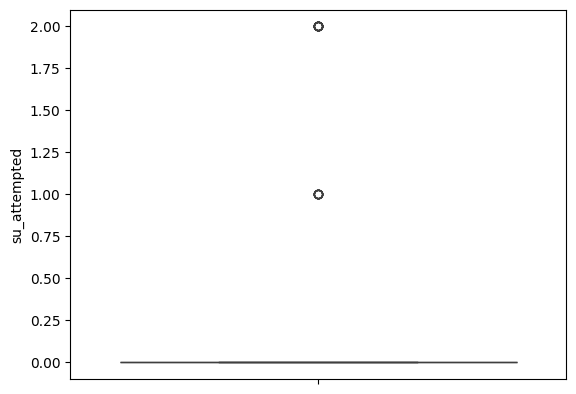

In [88]:
sns.boxplot(df['su_attempted'])

In [89]:
q1=df['su_attempted'].quantile(0.25)
q2=df['su_attempted'].quantile(0.50)
q3=df['su_attempted'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


#### 'num_root',

In [91]:
df['num_root'].value_counts()

num_root
0      25058
1         47
9         24
6         23
2         10
5          6
4          2
3          2
14         1
100        1
975        1
10         1
572        1
867        1
191        1
91         1
247        1
146        1
417        1
629        1
7          1
179        1
54         1
38         1
151        1
121        1
512        1
508        1
Name: count, dtype: int64

<Axes: ylabel='num_root'>

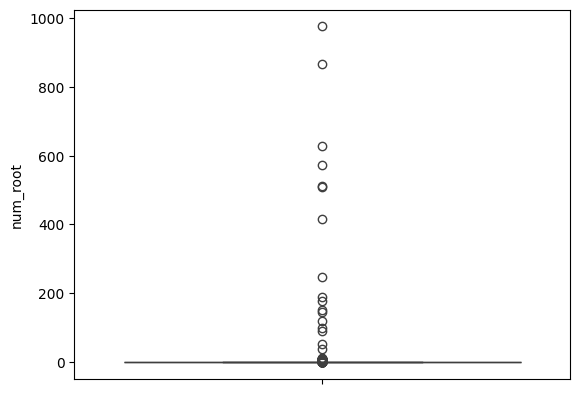

In [92]:
sns.boxplot(df['num_root'])

In [93]:
q1=df['num_root'].quantile(0.25)
q2=df['num_root'].quantile(0.50)
q3=df['num_root'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


#### 'num_file_creations',

In [95]:
df['num_file_creations'].value_counts()

num_file_creations
0     25126
1        37
2         7
4         3
8         2
18        2
5         2
21        1
11        1
20        1
3         1
40        1
17        1
6         1
14        1
19        1
29        1
13        1
15        1
38        1
Name: count, dtype: int64

<Axes: ylabel='num_file_creations'>

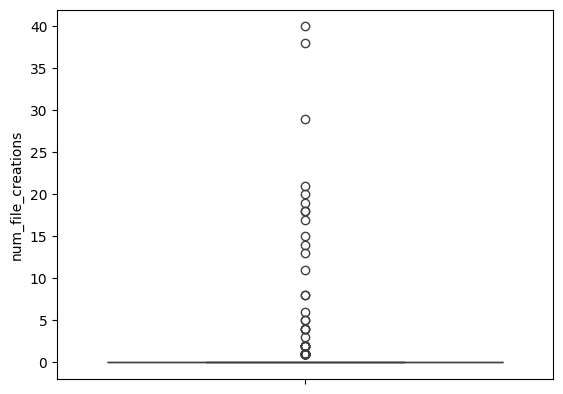

In [96]:
sns.boxplot(df['num_file_creations'])

In [97]:
q1=df['num_file_creations'].quantile(0.25)
q2=df['num_file_creations'].quantile(0.50)
q3=df['num_file_creations'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


#### 'num_shells'

In [99]:
df['num_shells'].value_counts()

num_shells
0    25183
1        9
Name: count, dtype: int64

<Axes: ylabel='num_shells'>

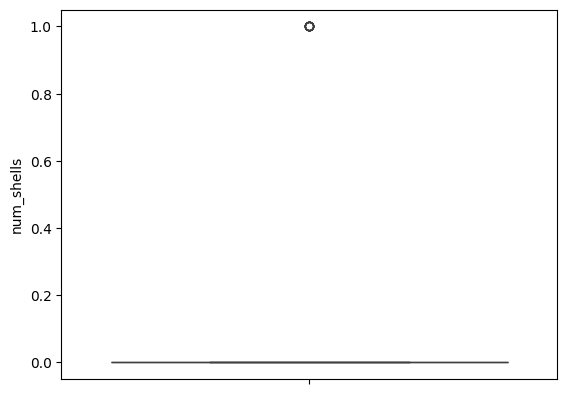

In [100]:
sns.boxplot(df['num_shells'])

### 'num_access_files',

In [102]:
df['num_access_files'].value_counts()

num_access_files
0    25113
1       65
2        8
3        2
5        2
4        1
8        1
Name: count, dtype: int64

<Axes: ylabel='num_access_files'>

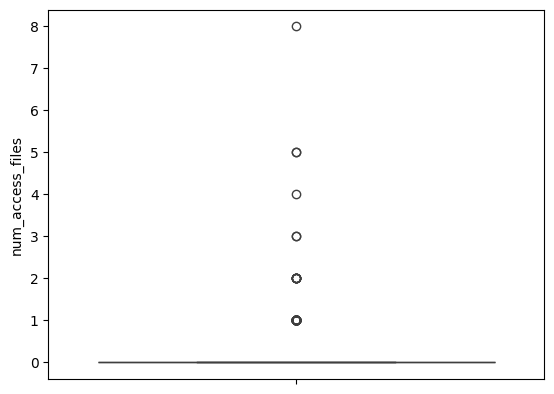

In [103]:
sns.boxplot(df['num_access_files'])

In [104]:
q1=df['num_access_files'].quantile(0.25)
q2=df['num_access_files'].quantile(0.50)
q3=df['num_access_files'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


### 'num_outbound_cmds',

In [106]:
df['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    25192
Name: count, dtype: int64

<Axes: ylabel='num_outbound_cmds'>

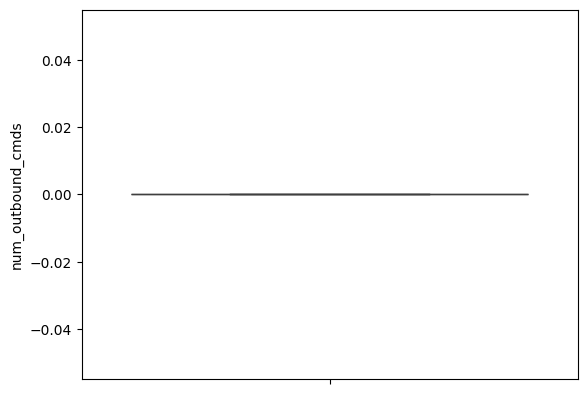

In [107]:
sns.boxplot(df['num_outbound_cmds'])

#### 'is_host_login'

In [109]:
df['is_host_login'].value_counts()

is_host_login
0    25192
Name: count, dtype: int64

<Axes: ylabel='is_host_login'>

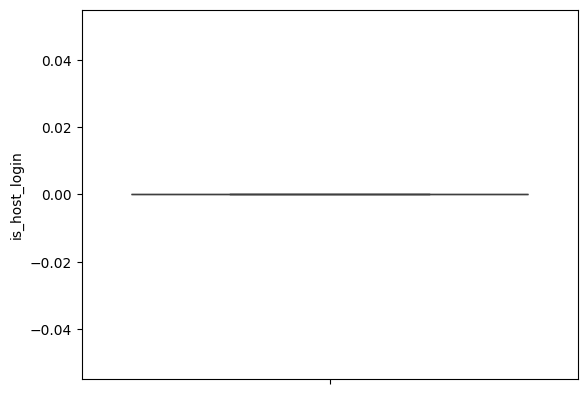

In [110]:
sns.boxplot(df['is_host_login'])

#### 'is_guest_login',

In [112]:
df['is_guest_login'].value_counts()

is_guest_login
0    24962
1      230
Name: count, dtype: int64

<Axes: ylabel='is_guest_login'>

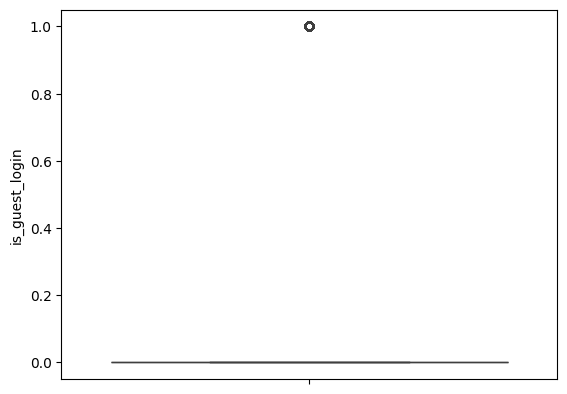

In [113]:
sns.boxplot(df['is_guest_login'])

In [114]:
q1=df['is_guest_login'].quantile(0.25)
q2=df['is_guest_login'].quantile(0.50)
q3=df['is_guest_login'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


#### 'count'

In [116]:
df['count'].value_counts()

count
1      5519
2      1934
3       769
4       696
5       597
       ... 
410       1
318       1
353       1
481       1
328       1
Name: count, Length: 466, dtype: int64

In [117]:
df['count'].describe()

count    25192.000000
mean        84.591180
std        114.673451
min          1.000000
25%          2.000000
50%         14.000000
75%        144.000000
max        511.000000
Name: count, dtype: float64

<Axes: ylabel='count'>

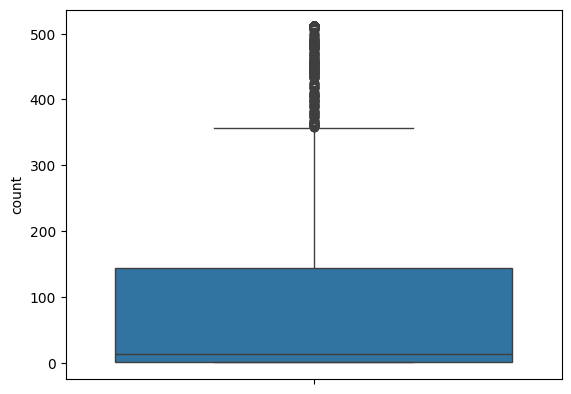

In [118]:
sns.boxplot(df['count'])

In [119]:
q1=df['count'].quantile(0.25)
q2=df['count'].quantile(0.50)
q3=df['count'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

357.0
-211.0


In [120]:
df['count'].median()

14.0

In [121]:
df['count']=np.where(df['count']>= 320,df['count'].median(),df['count'])

<Axes: ylabel='count'>

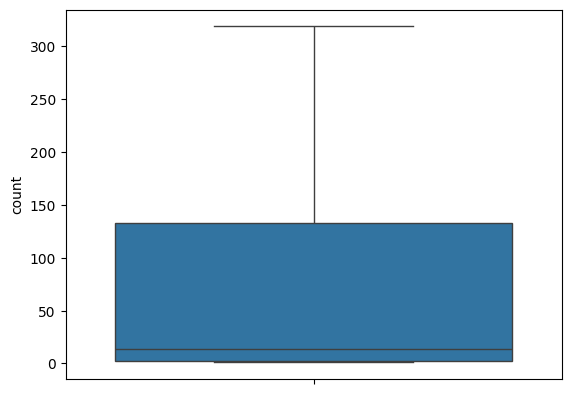

In [122]:
sns.boxplot(df['count'])

#### 'srv_count',

In [124]:
df['srv_count'].value_counts()

srv_count
1      5080
2      2538
3      1223
4      1086
5       913
       ... 
481       1
278       1
338       1
351       1
408       1
Name: count, Length: 414, dtype: int64

<Axes: ylabel='srv_count'>

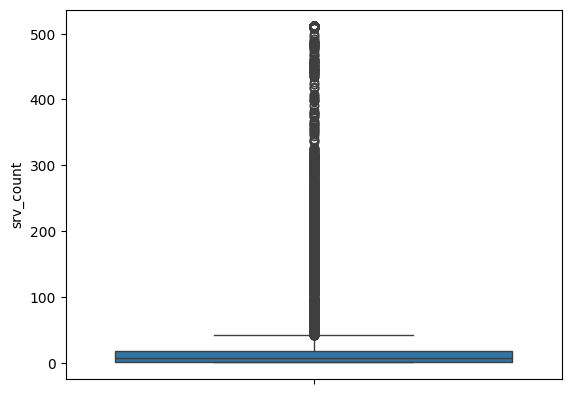

In [125]:
sns.boxplot(df['srv_count'])

In [126]:
q1=df['srv_count'].quantile(0.25)
q2=df['srv_count'].quantile(0.50)
q3=df['srv_count'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

42.0
-22.0


In [127]:
df['srv_count'].median()

8.0

In [128]:
df['srv_count']=np.where(df['srv_count']>= 23,df['srv_count'].median(),df['srv_count'])

<Axes: ylabel='srv_count'>

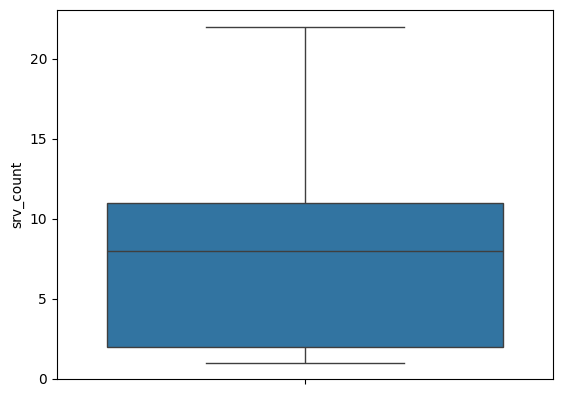

In [129]:
sns.boxplot(df['srv_count'])

#### 'serror_rate',

In [131]:
df['serror_rate'].value_counts()

serror_rate
0.00    17329
1.00     6941
0.50      122
0.07       53
0.06       50
        ...  
0.26        1
0.55        1
0.91        1
0.59        1
0.74        1
Name: count, Length: 70, dtype: int64

<Axes: ylabel='serror_rate'>

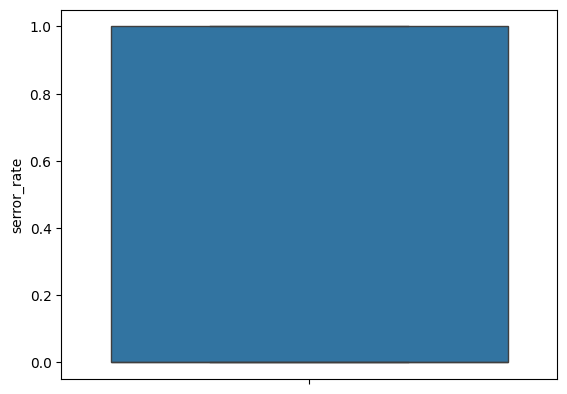

In [132]:
sns.boxplot(df['serror_rate'])

In [133]:
df['serror_rate'].describe()

count    25192.000000
mean         0.286338
std          0.447312
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: serror_rate, dtype: float64

In [134]:
q1=df['serror_rate'].quantile(0.25)
q2=df['serror_rate'].quantile(0.50)
q3=df['serror_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

2.5
-1.5


In [135]:
df['serror_rate']=np.where(df['serror_rate']>= upper_limit,upper_limit,df['serror_rate'])

<Axes: ylabel='serror_rate'>

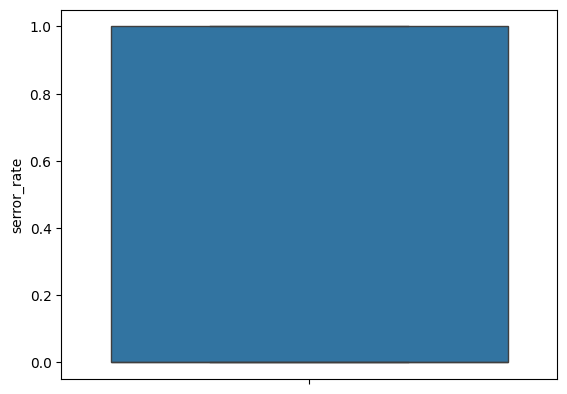

In [136]:
sns.boxplot(df['serror_rate'])

#### 'srv_serror_rate'

In [138]:
df['srv_serror_rate'].value_counts()

srv_serror_rate
0.00    17708
1.00     7003
0.50       94
0.33       51
0.25       42
0.20       32
0.05       26
0.17       22
0.03       20
0.04       20
0.07       16
0.02       13
0.67       13
0.09       10
0.10       10
0.08       10
0.06       10
0.12       10
0.95        9
0.14        9
0.11        8
0.40        5
0.90        4
0.22        4
0.80        3
0.91        3
0.89        3
0.92        3
0.29        2
0.76        2
0.18        2
0.45        1
0.13        1
0.65        1
0.75        1
0.39        1
0.59        1
0.46        1
0.88        1
0.83        1
0.26        1
0.41        1
0.74        1
0.01        1
0.86        1
0.94        1
0.93        1
0.57        1
0.60        1
0.34        1
0.36        1
0.55        1
0.53        1
0.78        1
0.43        1
0.15        1
Name: count, dtype: int64

In [139]:
df['srv_serror_rate'].describe()

count    25192.000000
mean         0.283762
std          0.447599
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: srv_serror_rate, dtype: float64

<Axes: ylabel='srv_serror_rate'>

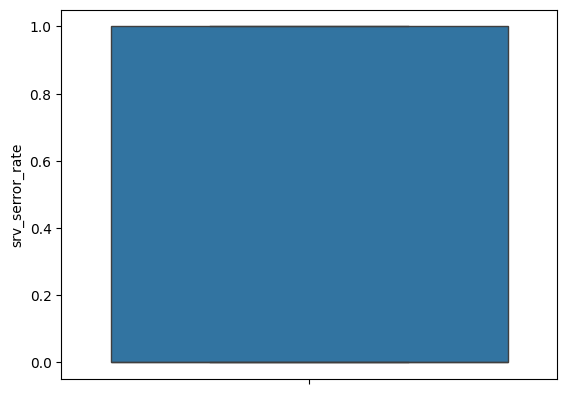

In [140]:
sns.boxplot(df['srv_serror_rate'])

In [141]:
q1=df['srv_serror_rate'].quantile(0.25)
q2=df['srv_serror_rate'].quantile(0.50)
q3=df['srv_serror_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

2.5
-1.5


In [142]:
df['srv_serror_rate']=np.where(df['srv_serror_rate']>= upper_limit,upper_limit,df['srv_serror_rate'])

In [143]:
df['srv_serror_rate']=np.where(df['srv_serror_rate']<= lower_limit,lower_limit,df['srv_serror_rate'])

<Axes: xlabel='srv_serror_rate', ylabel='Density'>

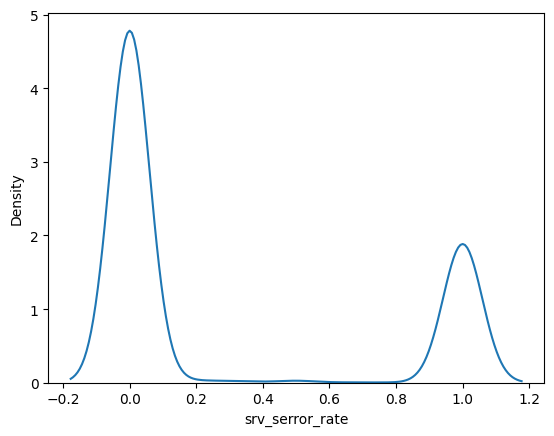

In [144]:
sns.kdeplot(df['srv_serror_rate'])

<Axes: ylabel='srv_serror_rate'>

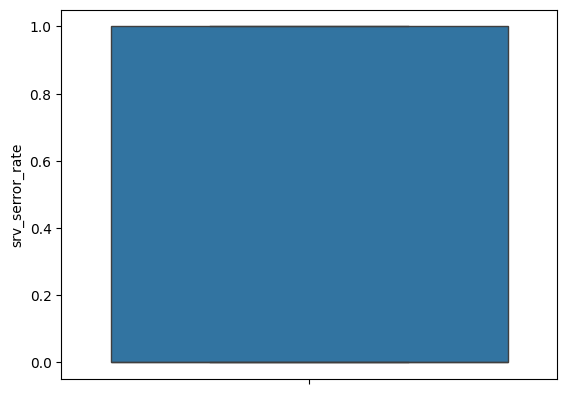

In [145]:
sns.boxplot(df['srv_serror_rate'])

#### 'rerror_rate'

In [147]:
df[ 'rerror_rate'].value_counts()

rerror_rate
0.00    21985
1.00     2552
0.90       43
0.89       39
0.91       38
        ...  
0.09        1
0.44        1
0.21        1
0.32        1
0.57        1
Name: count, Length: 72, dtype: int64

In [148]:
df['rerror_rate'].describe()

count    25192.000000
mean         0.118630
std          0.318745
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: rerror_rate, dtype: float64

<Axes: ylabel='rerror_rate'>

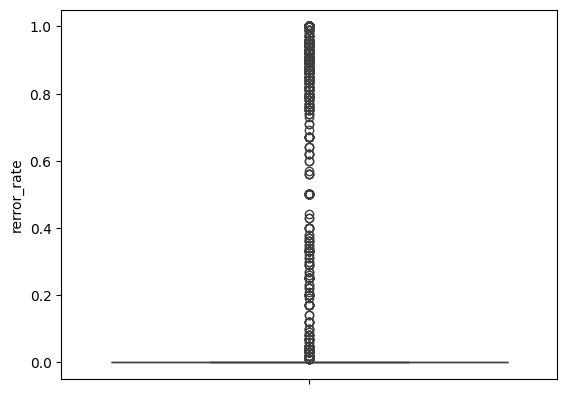

In [149]:
sns.boxplot(df[ 'rerror_rate'])

In [150]:
q1=df['rerror_rate'].quantile(0.25)
q2=df['rerror_rate'].quantile(0.50)
q3=df['rerror_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


#### 'srv_rerror_rate'

In [152]:
df['srv_rerror_rate'].value_counts()

srv_rerror_rate
0.00    21959
1.00     2937
0.50       56
0.33       32
0.25       26
0.17       17
0.20       16
0.04       14
0.08       11
0.67       11
0.14       10
0.06       10
0.02        9
0.05        8
0.03        8
0.10        8
0.07        7
0.12        5
0.75        5
0.62        4
0.83        3
0.40        3
0.29        3
0.80        3
0.11        3
0.43        2
0.60        2
0.81        2
0.64        2
0.09        2
0.79        2
0.71        2
0.56        1
0.84        1
0.74        1
0.38        1
0.85        1
0.15        1
0.69        1
0.73        1
0.76        1
0.57        1
Name: count, dtype: int64

<Axes: ylabel='srv_rerror_rate'>

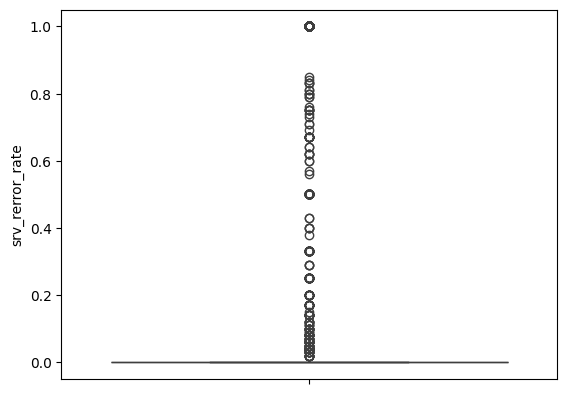

In [153]:
sns.boxplot(df['srv_rerror_rate'])

In [154]:
q1=df['srv_rerror_rate'].quantile(0.25)
q2=df['srv_rerror_rate'].quantile(0.50)
q3=df['srv_rerror_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


### 'same_srv_rate'

In [156]:
df[ 'same_srv_rate'].value_counts()

same_srv_rate
1.00    15357
0.01      827
0.02      710
0.06      681
0.03      678
        ...  
0.78        1
0.70        1
0.61        1
0.82        1
0.81        1
Name: count, Length: 97, dtype: int64

<Axes: ylabel='same_srv_rate'>

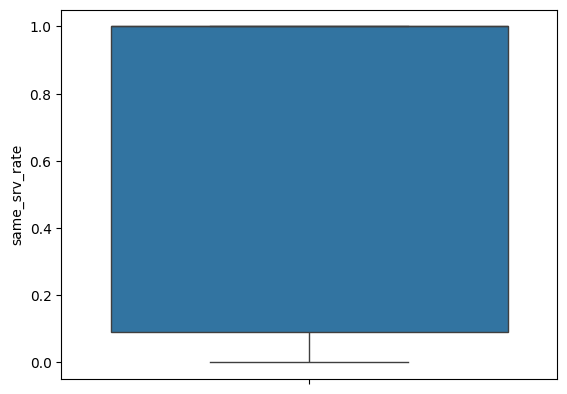

In [157]:
sns.boxplot(df[ 'same_srv_rate'])

<Axes: xlabel='same_srv_rate', ylabel='Density'>

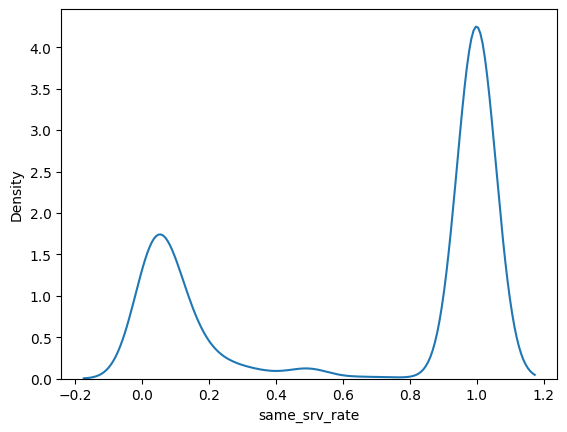

In [158]:
sns.kdeplot(df[ 'same_srv_rate'])

In [159]:
df[ 'same_srv_rate'].describe()

count    25192.000000
mean         0.660559
std          0.439637
min          0.000000
25%          0.090000
50%          1.000000
75%          1.000000
max          1.000000
Name: same_srv_rate, dtype: float64

In [160]:
q1=df['same_srv_rate'].quantile(0.25)
q2=df['same_srv_rate'].quantile(0.50)
q3=df['same_srv_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

2.365
-1.275


In [161]:
df['same_srv_rate']=np.where(df['same_srv_rate']>= upper_limit,upper_limit,df['same_srv_rate'])

#### 'diff_srv_rate'

In [163]:
df[ 'diff_srv_rate'].describe()

count    25192.000000
mean         0.062363
std          0.178550
min          0.000000
25%          0.000000
50%          0.000000
75%          0.060000
max          1.000000
Name: diff_srv_rate, dtype: float64

In [164]:
df[ 'diff_srv_rate'].value_counts()

diff_srv_rate
0.00    15245
0.06     3861
0.07     1947
0.05     1350
1.00      663
        ...  
0.76        1
0.59        1
0.77        1
0.56        1
0.70        1
Name: count, Length: 79, dtype: int64

<Axes: ylabel='diff_srv_rate'>

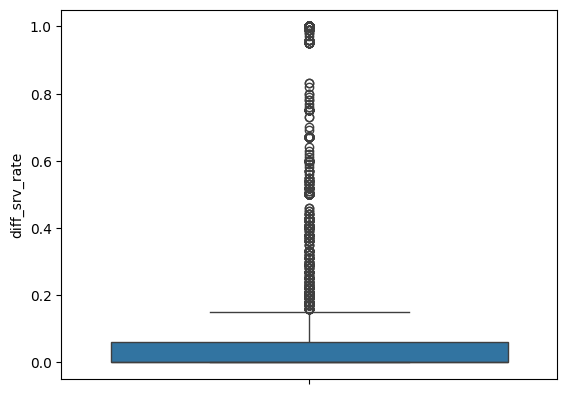

In [165]:
sns.boxplot(df[ 'diff_srv_rate'])

In [166]:
q1=df['diff_srv_rate'].quantile(0.25)
q2=df['diff_srv_rate'].quantile(0.50)
q3=df['diff_srv_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.15
-0.09


In [167]:
df['diff_srv_rate']=np.where(df['diff_srv_rate']>= upper_limit,upper_limit,df['diff_srv_rate'])

<Axes: ylabel='diff_srv_rate'>

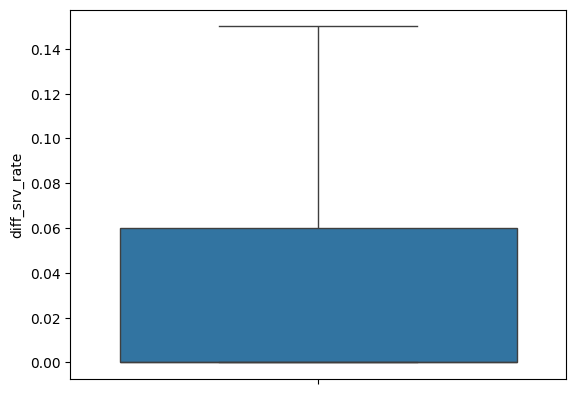

In [168]:
sns.boxplot(df['diff_srv_rate'])

### 'srv_diff_host_rate'

In [170]:
df['srv_diff_host_rate'].describe()

count    25192.000000
mean         0.095931
std          0.256583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: srv_diff_host_rate, dtype: float64

In [171]:
df['srv_diff_host_rate'].value_counts()

srv_diff_host_rate
0.00    19517
1.00     1559
0.01      586
0.67      210
0.50      193
0.12      170
0.33      167
0.25      164
0.02      153
0.11      143
0.10      138
0.29      129
0.18      129
0.17      128
0.08      124
0.40      123
0.20      122
0.14      121
0.06      118
0.09      112
0.07      111
0.15      111
0.22      111
0.13       81
0.05       59
0.75       58
0.19       57
0.21       47
0.16       46
0.23       43
0.27       42
0.60       41
0.03       40
0.04       39
0.43       34
0.30       29
0.38       28
0.36       21
0.80       14
0.31       11
0.24       11
0.44        7
0.57        7
0.28        6
0.42        5
0.26        4
0.56        4
0.45        3
0.62        3
0.71        3
0.32        2
0.35        2
0.37        2
0.83        1
0.55        1
0.88        1
0.47        1
Name: count, dtype: int64

<Axes: ylabel='srv_diff_host_rate'>

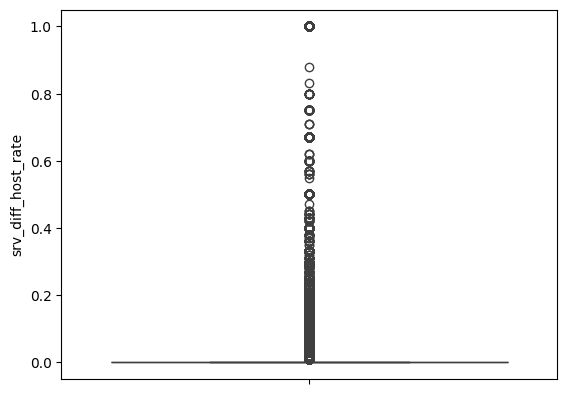

In [172]:
sns.boxplot(df['srv_diff_host_rate'])

In [173]:
q1=df['srv_diff_host_rate'].quantile(0.25)
q2=df['srv_diff_host_rate'].quantile(0.50)
q3=df['srv_diff_host_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


#### 'dst_host_count',

In [175]:
df[ 'dst_host_count'].describe()

count    25192.000000
mean       182.532074
std         98.993895
min          0.000000
25%         84.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64

In [176]:
df[ 'dst_host_count'].value_counts()

dst_host_count
255    14850
1        601
2        554
3        251
4        241
       ...  
219       11
229       10
206        9
233        8
0          1
Name: count, Length: 256, dtype: int64

<Axes: ylabel='dst_host_count'>

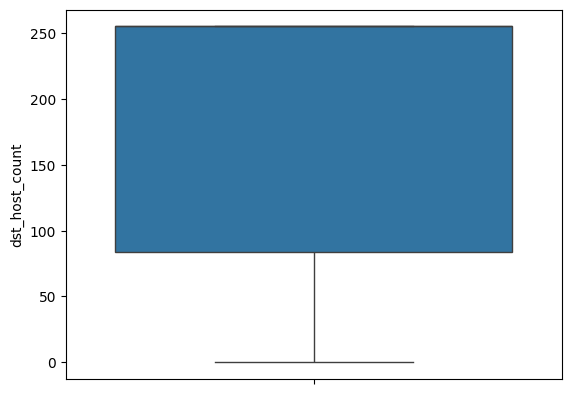

In [177]:
sns.boxplot(df['dst_host_count'])

In [178]:
q1=df['dst_host_count'].quantile(0.25)
q2=df['dst_host_count'].quantile(0.50)
q3=df['dst_host_count'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

511.5
-172.5


In [179]:
df['dst_host_count']=np.where(df['dst_host_count']>= upper_limit,upper_limit,df['dst_host_count'])

In [180]:
df['dst_host_count']=np.where(df['dst_host_count']<= lower_limit,lower_limit,df['dst_host_count'])

<Axes: ylabel='dst_host_count'>

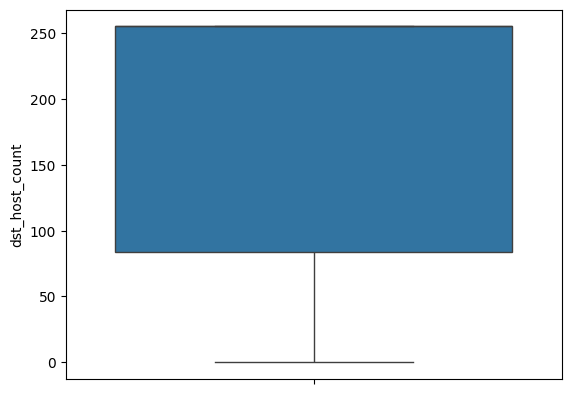

In [181]:
sns.boxplot(df['dst_host_count'])

#### 'dst_host_srv_count',

In [183]:
df[ 'dst_host_srv_count'].value_counts()

dst_host_srv_count
255    7148
1      1658
2      1041
3       556
4       516
       ... 
188      11
204      10
220       9
221       7
0         1
Name: count, Length: 256, dtype: int64

In [184]:
df[ 'dst_host_srv_count'].describe()

count    25192.000000
mean       115.063036
std        110.646850
min          0.000000
25%         10.000000
50%         61.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64

<Axes: ylabel='dst_host_srv_count'>

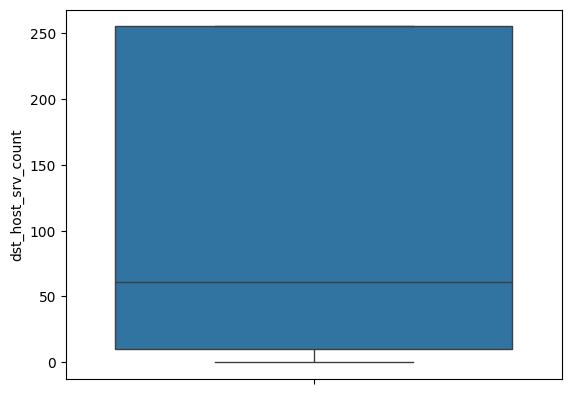

In [185]:
sns.boxplot(df[ 'dst_host_srv_count'])

### 'dst_host_same_srv_rate',

In [187]:
df[ 'dst_host_same_srv_rate'].value_counts()

dst_host_same_srv_rate
1.00    9758
0.01    1541
0.00    1379
0.02    1325
0.07    1122
        ... 
0.51      33
0.37      33
0.68      32
0.42      30
0.66      26
Name: count, Length: 101, dtype: int64

In [188]:
df[ 'dst_host_same_srv_rate'].describe()

count    25192.000000
mean         0.519791
std          0.448944
min          0.000000
25%          0.050000
50%          0.510000
75%          1.000000
max          1.000000
Name: dst_host_same_srv_rate, dtype: float64

<Axes: ylabel='dst_host_same_srv_rate'>

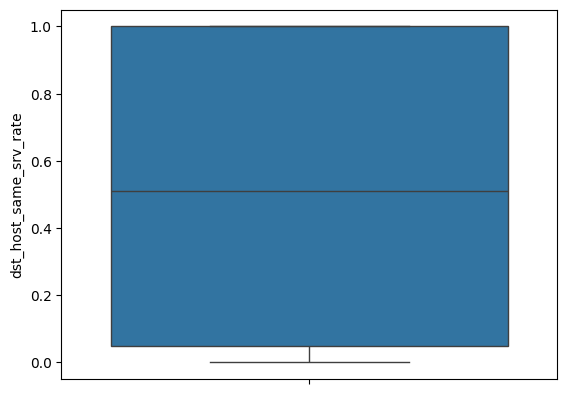

In [189]:
sns.boxplot(df[ 'dst_host_same_srv_rate'])

#### 'dst_host_diff_srv_rate',

In [191]:
df[ 'dst_host_diff_srv_rate'].value_counts()

dst_host_diff_srv_rate
0.00    9343
0.07    3448
0.06    1917
0.01    1881
0.05    1436
        ... 
0.41       6
0.98       6
0.88       5
0.90       5
0.93       3
Name: count, Length: 101, dtype: int64

In [192]:
df['dst_host_diff_srv_rate'].describe()

count    25192.000000
mean         0.082539
std          0.187191
min          0.000000
25%          0.000000
50%          0.030000
75%          0.070000
max          1.000000
Name: dst_host_diff_srv_rate, dtype: float64

<Axes: ylabel='dst_host_diff_srv_rate'>

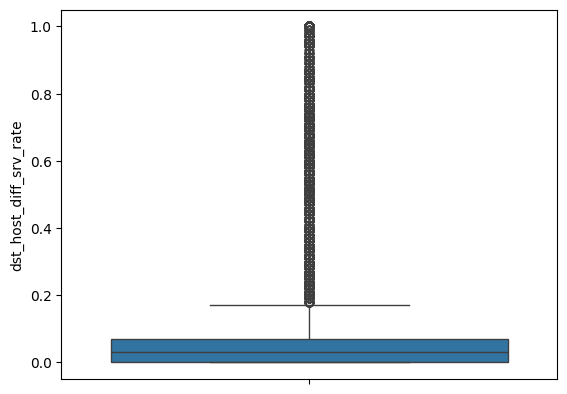

In [193]:
sns.boxplot(df[ 'dst_host_diff_srv_rate'])

In [194]:
q1=df['dst_host_diff_srv_rate'].quantile(0.25)
q2=df['dst_host_diff_srv_rate'].quantile(0.50)
q3=df['dst_host_diff_srv_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.17500000000000002
-0.10500000000000001


In [195]:
df['dst_host_diff_srv_rate']=np.where(df['dst_host_diff_srv_rate']>= upper_limit,upper_limit,df['dst_host_diff_srv_rate'])

In [196]:
df['dst_host_diff_srv_rate']=np.where(df['dst_host_diff_srv_rate']<= lower_limit,lower_limit,df['dst_host_diff_srv_rate'])

<Axes: ylabel='dst_host_diff_srv_rate'>

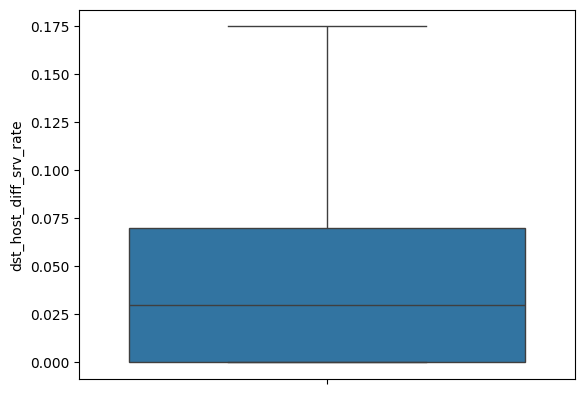

In [197]:
sns.boxplot(df[ 'dst_host_diff_srv_rate'])

#### 'dst_host_same_src_port_rate',

In [199]:
df[ 'dst_host_same_src_port_rate'].describe()

count    25192.000000
mean         0.147453
std          0.308367
min          0.000000
25%          0.000000
50%          0.000000
75%          0.060000
max          1.000000
Name: dst_host_same_src_port_rate, dtype: float64

In [200]:
df['dst_host_same_src_port_rate'].value_counts()

dst_host_same_src_port_rate
0.00    12673
0.01     3557
1.00     2052
0.02     1115
0.03      624
        ...  
0.63       11
0.65       11
0.72       10
0.66        9
0.81        9
Name: count, Length: 101, dtype: int64

<Axes: ylabel='dst_host_same_src_port_rate'>

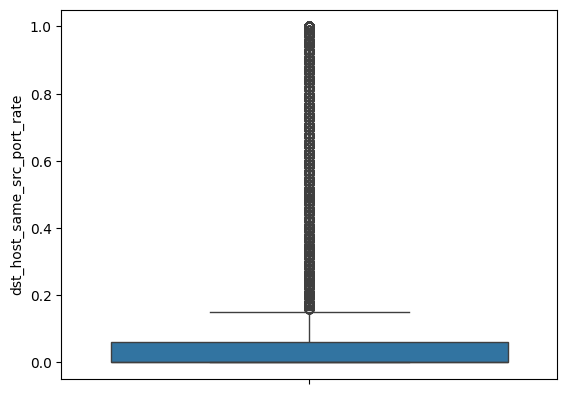

In [201]:
sns.boxplot(df['dst_host_same_src_port_rate'])

In [202]:
q1=df['dst_host_same_src_port_rate'].quantile(0.25)
q2=df['dst_host_same_src_port_rate'].quantile(0.50)
q3=df['dst_host_same_src_port_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.15
-0.09


In [203]:
df['dst_host_same_src_port_rate']=np.where(df['dst_host_same_src_port_rate']>= upper_limit,upper_limit,df['dst_host_same_src_port_rate'])

<Axes: ylabel='dst_host_same_src_port_rate'>

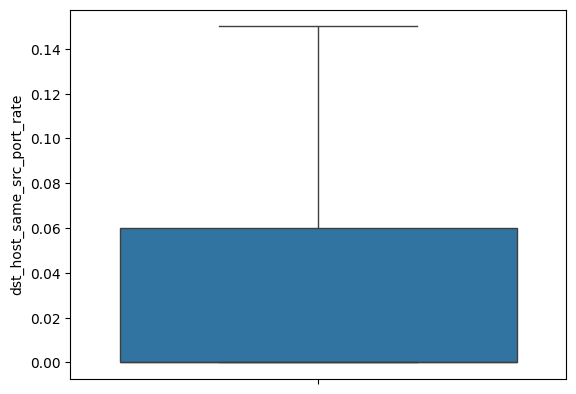

In [204]:
sns.boxplot(df['dst_host_same_src_port_rate'])

#### 'dst_host_srv_diff_host_rate'

In [206]:
df[ 'dst_host_srv_diff_host_rate'].describe()

count    25192.000000
mean         0.031844
std          0.110575
min          0.000000
25%          0.000000
50%          0.000000
75%          0.020000
max          1.000000
Name: dst_host_srv_diff_host_rate, dtype: float64

In [207]:
df[ 'dst_host_srv_diff_host_rate'].value_counts()

dst_host_srv_diff_host_rate
0.00    17387
0.02     1612
0.01     1468
0.03      950
0.04      870
        ...  
0.46        1
0.36        1
0.42        1
0.39        1
0.86        1
Name: count, Length: 63, dtype: int64

<Axes: ylabel='dst_host_srv_diff_host_rate'>

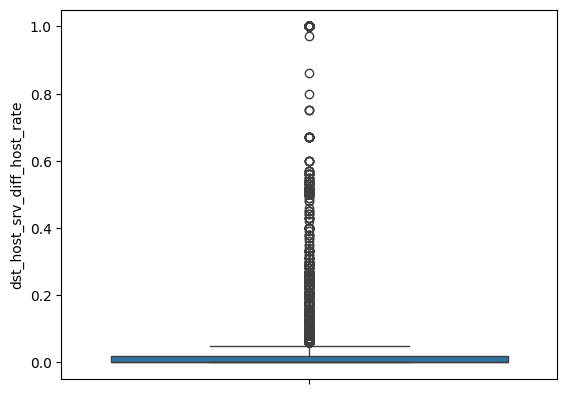

In [208]:
sns.boxplot(df[ 'dst_host_srv_diff_host_rate'])

In [209]:
q1=df['dst_host_srv_diff_host_rate'].quantile(0.25)
q2=df['dst_host_srv_diff_host_rate'].quantile(0.50)
q3=df['dst_host_srv_diff_host_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.05
-0.03


In [210]:
df['dst_host_srv_diff_host_rate']=np.where(df['dst_host_srv_diff_host_rate']>= upper_limit,upper_limit,df['dst_host_srv_diff_host_rate'])

<Axes: ylabel='dst_host_srv_diff_host_rate'>

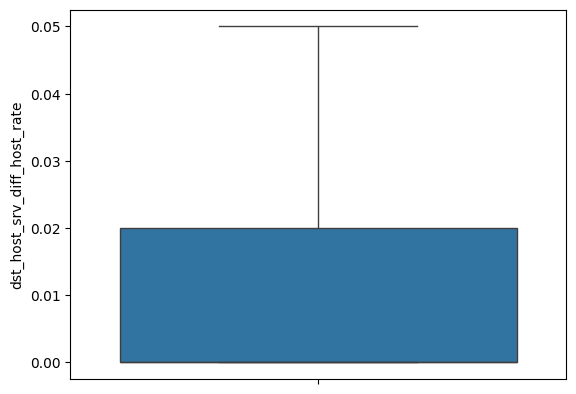

In [211]:
sns.boxplot(df[ 'dst_host_srv_diff_host_rate'])

#### 'dst_host_serror_rate',

In [213]:
df[ 'dst_host_serror_rate'].describe()

count    25192.000000
mean         0.285800
std          0.445316
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: dst_host_serror_rate, dtype: float64

In [214]:
df[ 'dst_host_serror_rate'].value_counts()

dst_host_serror_rate
0.00    16221
1.00     6739
0.01      680
0.02      237
0.03      149
        ...  
0.28        1
0.61        1
0.32        1
0.83        1
0.54        1
Name: count, Length: 100, dtype: int64

<Axes: ylabel='dst_host_serror_rate'>

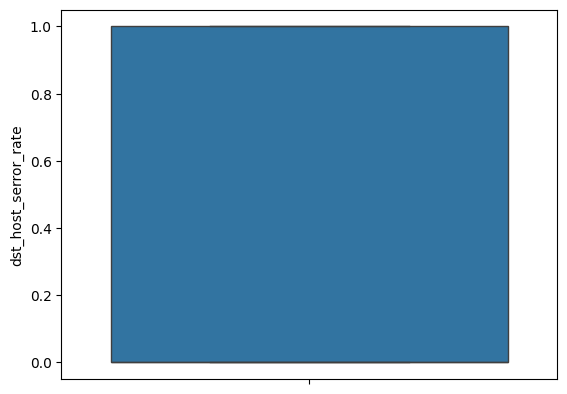

In [215]:
sns.boxplot(df[ 'dst_host_serror_rate'])

In [216]:
q1=df['dst_host_serror_rate'].quantile(0.25)
q2=df['dst_host_serror_rate'].quantile(0.50)
q3=df['dst_host_serror_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

2.5
-1.5


In [217]:
df['dst_host_serror_rate']=np.where(df['dst_host_serror_rate']>= upper_limit,upper_limit,df['dst_host_serror_rate'])

<Axes: ylabel='dst_host_serror_rate'>

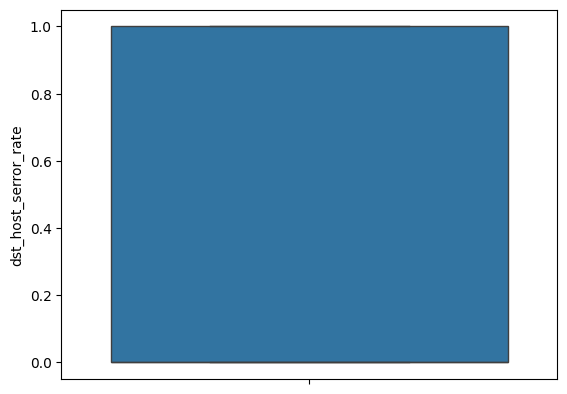

In [218]:
sns.boxplot(df[ 'dst_host_serror_rate'])

#### 'dst_host_srv_serror_rate',

In [220]:
df[ 'dst_host_srv_serror_rate'].value_counts()

dst_host_srv_serror_rate
0.00    17005
1.00     6862
0.01      758
0.02      136
0.03       32
        ...  
0.77        1
0.87        1
0.84        1
0.82        1
0.24        1
Name: count, Length: 88, dtype: int64

<Axes: ylabel='dst_host_srv_serror_rate'>

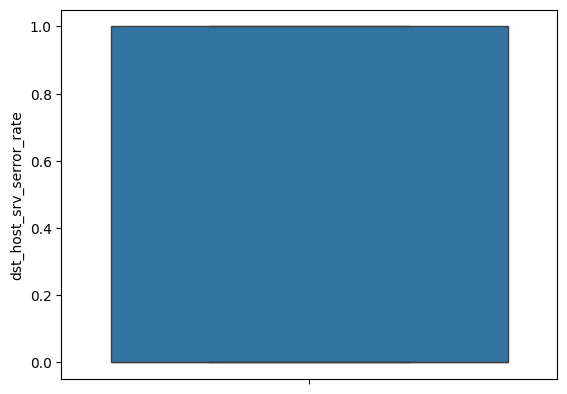

In [221]:
sns.boxplot(df[ 'dst_host_srv_serror_rate'])

In [222]:
df['dst_host_srv_serror_rate'].describe()

count    25192.000000
mean         0.279846
std          0.446075
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: dst_host_srv_serror_rate, dtype: float64

#### dst_host_rerror_rate',

In [224]:
df['dst_host_rerror_rate'].value_counts()

dst_host_rerror_rate
0.00    20688
1.00     2069
0.01      359
0.02      232
0.03      110
        ...  
0.99        7
0.39        7
0.54        7
0.60        6
0.48        4
Name: count, Length: 101, dtype: int64

<Axes: ylabel='dst_host_rerror_rate'>

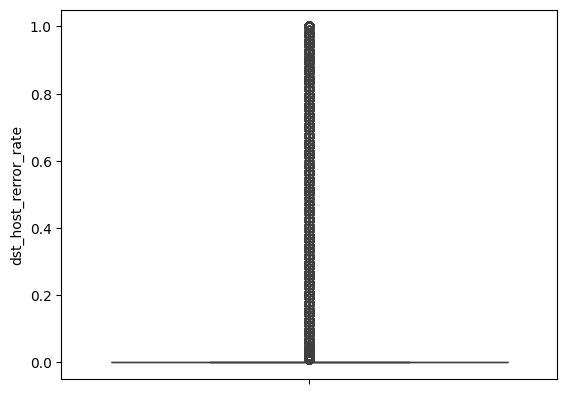

In [225]:
sns.boxplot(df['dst_host_rerror_rate'])

In [226]:
q1=df['dst_host_rerror_rate'].quantile(0.25)
q2=df['dst_host_rerror_rate'].quantile(0.50)
q3=df['dst_host_rerror_rate'].quantile(0.75)

iqr = q3-q1

upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit)
print(lower_limit)

0.0
0.0


In [227]:
df['dst_host_rerror_rate']=np.where(df['dst_host_rerror_rate'] >= upper_limit, upper_limit, df['dst_host_rerror_rate'])

<Axes: ylabel='dst_host_rerror_rate'>

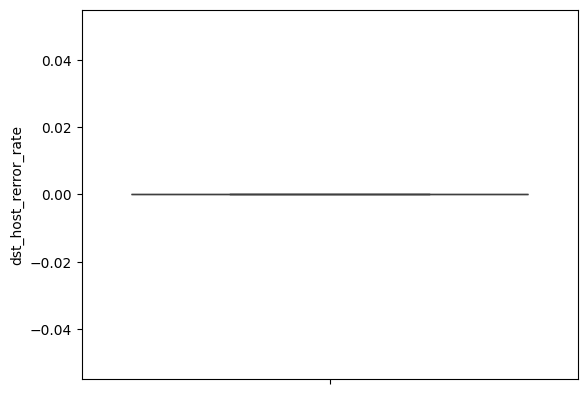

In [228]:
sns.boxplot(df['dst_host_rerror_rate'])

#### 'dst_host_srv_rerror_rate'

In [230]:
df['dst_host_srv_rerror_rate'].value_counts()

dst_host_srv_rerror_rate
0.00    21349
1.00     2617
0.01      253
0.02      124
0.03       78
        ...  
0.39        1
0.21        1
0.44        1
0.43        1
0.46        1
Name: count, Length: 100, dtype: int64

In [231]:
df['dst_host_srv_rerror_rate'].describe()

count    25192.000000
mean         0.118769
std          0.317333
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_srv_rerror_rate, dtype: float64

<Axes: ylabel='dst_host_srv_rerror_rate'>

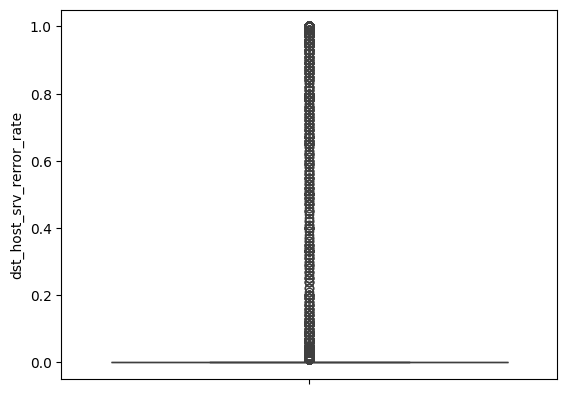

In [232]:
sns.boxplot(df['dst_host_srv_rerror_rate'])

In [233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2686.555640,0.0,0.00,0.00,0.00,42862.000
protocol_type,25192.0,1.053827,0.426998,0.0,1.00,1.00,1.00,2.000
service,25192.0,29.039139,15.555601,0.0,19.00,22.00,46.00,65.000
flag,25192.0,6.982455,2.679322,0.0,5.00,9.00,9.00,10.000
src_bytes,25192.0,171.689644,225.629906,0.0,0.00,44.00,279.00,697.500
dst_bytes,25192.0,362.643791,505.607576,0.0,0.00,44.00,697.50,1325.625
land,25192.0,0.000079,0.008910,0.0,0.00,0.00,0.00,1.000
wrong_fragment,25192.0,0.023738,0.260221,0.0,0.00,0.00,0.00,3.000
urgent,25192.0,0.000040,0.006300,0.0,0.00,0.00,0.00,1.000
hot,25192.0,0.198039,2.154202,0.0,0.00,0.00,0.00,77.000


#### Logistic Regression

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [236]:
correlation_matrix = df.corr()

In [237]:
correlation_matrix

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.036421,0.101301,-0.066634,-0.034434,-0.037812,-0.001012,-0.010358,-0.000486,0.004202,...,-0.112530,-0.119321,0.252022,0.178654,-0.059031,-0.066513,-0.066240,NaN,0.208435,-0.050901
protocol_type,0.036421,1.000000,0.025322,0.094926,-0.172454,-0.124569,-0.001123,0.176420,-0.000794,-0.011589,...,0.104292,0.004797,0.116873,-0.159014,-0.287222,-0.080432,-0.079086,NaN,-0.047182,0.283653
service,0.101301,0.025322,1.000000,-0.295491,-0.042128,-0.158865,-0.006896,0.088169,0.011325,-0.056165,...,-0.409442,-0.450546,0.427535,-0.120685,-0.247606,0.276906,0.273472,NaN,0.142865,-0.270494
flag,-0.066634,0.094926,-0.295491,1.000000,0.551611,0.517371,-0.006593,0.068693,0.004744,0.067027,...,0.584087,0.634415,-0.456710,0.261226,0.243052,-0.447140,-0.447007,NaN,-0.716075,0.651309
src_bytes,-0.034434,-0.172454,-0.042128,0.551611,1.000000,0.628913,-0.006780,-0.041800,0.012547,0.198222,...,0.353650,0.382679,-0.229337,0.191980,0.130089,-0.454827,-0.462896,NaN,-0.254642,0.488798
dst_bytes,-0.037812,-0.124569,-0.158865,0.517371,0.628913,1.000000,-0.006391,-0.053107,0.012000,0.158987,...,0.540878,0.528040,-0.386912,0.044393,0.242440,-0.435010,-0.436393,NaN,-0.235556,0.542633
land,-0.001012,-0.001123,-0.006896,-0.006593,-0.006780,-0.006391,1.000000,-0.000813,-0.000056,-0.000819,...,-0.008743,0.009531,-0.007613,0.016467,0.020301,0.014291,0.005596,NaN,-0.003335,-0.000605
wrong_fragment,-0.010358,0.176420,0.088169,0.068693,-0.041800,-0.053107,-0.000813,1.000000,-0.000575,-0.008386,...,-0.047256,-0.051845,0.038834,0.133494,-0.045554,-0.053786,-0.057230,NaN,-0.034143,-0.097625
urgent,-0.000486,-0.000794,0.011325,0.004744,0.012547,0.012000,-0.000056,-0.000575,1.000000,0.002346,...,-0.006324,-0.007014,-0.002936,-0.004180,-0.003652,-0.004044,-0.003953,NaN,-0.002358,-0.006743
hot,0.004202,-0.011589,-0.056165,0.067027,0.198222,0.158987,-0.000819,-0.008386,0.002346,1.000000,...,-0.048495,-0.033442,0.000942,-0.035665,-0.046138,-0.055628,-0.056255,NaN,-0.029719,0.012839


In [238]:
moderate_correlations = correlation_matrix[(correlation_matrix > 0.2) & (correlation_matrix <= 0.8) | 
                                           (correlation_matrix < -0.2) & (correlation_matrix >= -0.8)]

In [239]:
df1=moderate_correlations.iloc[41:].T
df1

,class
duration,NaN
protocol_type,0.283653
service,-0.270494
flag,0.651309
src_bytes,0.488798
dst_bytes,0.542633
land,NaN
wrong_fragment,NaN
urgent,NaN
hot,NaN


In [240]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, duration to class
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   22 non-null     float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [241]:
nan_rows = df1[df1['class'].isna()]
nan_rows.T

,duration,land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,srv_diff_host_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,class
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
nan_list = nan_rows.index.tolist()
nan_list

['duration',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'srv_diff_host_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'class']

#### Droping the feature

In [244]:
x = df.drop(columns= nan_list, axis=1)
y = df['class']

In [245]:
x

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
0,1,19,9,491.0,491.000,0.0,2.0,2.0,0.0,0.0,...,1.00,0.00,150.0,25,0.17,0.030,0.00,0.00,0.00,0.00
1,2,41,9,146.0,146.000,0.0,13.0,1.0,0.0,0.0,...,0.08,0.15,255.0,1,0.00,0.175,0.00,0.00,0.00,0.00
2,1,46,5,0.0,0.000,0.0,123.0,6.0,1.0,1.0,...,0.05,0.07,255.0,26,0.10,0.050,0.00,1.00,1.00,0.00
3,1,22,9,232.0,1325.625,1.0,5.0,5.0,0.2,0.2,...,1.00,0.00,30.0,255,1.00,0.000,0.04,0.03,0.01,0.01
4,1,22,9,199.0,199.000,1.0,30.0,8.0,0.0,0.0,...,1.00,0.00,255.0,255,1.00,0.000,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,0.0,0.000,0.0,100.0,7.0,0.0,0.0,...,0.07,0.07,255.0,7,0.03,0.060,0.00,0.00,0.00,1.00
25188,1,19,9,334.0,334.000,1.0,1.0,1.0,0.0,0.0,...,1.00,0.00,1.0,39,1.00,0.000,0.05,0.00,0.00,0.00
25189,1,46,1,0.0,0.000,0.0,105.0,7.0,0.0,0.0,...,0.07,0.07,255.0,13,0.05,0.070,0.00,0.00,0.00,1.00
25190,1,38,5,0.0,0.000,0.0,129.0,18.0,1.0,1.0,...,0.14,0.06,255.0,20,0.08,0.060,0.00,1.00,1.00,0.00


In [246]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int32

#### data split

In [248]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=18)

In [249]:
x_train

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
19802,1,22,9,214.0,214.000,1.0,18.0,21.0,0.0,0.0,...,1.00,0.00,114.0,255,1.00,0.000,0.02,0.00,0.0,0.00
13316,1,22,9,382.0,382.000,1.0,1.0,8.0,0.0,0.0,...,1.00,0.00,54.0,255,1.00,0.000,0.05,0.00,0.0,0.00
22982,1,22,9,195.0,1325.625,1.0,2.0,3.0,0.0,0.0,...,1.00,0.00,5.0,255,1.00,0.000,0.05,0.00,0.0,0.00
22726,1,3,9,10.0,10.000,1.0,2.0,1.0,0.0,0.0,...,0.50,0.15,98.0,10,0.06,0.040,0.05,0.00,0.0,0.00
6406,2,11,9,44.0,44.000,0.0,78.0,8.0,0.0,0.0,...,1.00,0.00,255.0,254,1.00,0.010,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18674,2,11,9,44.0,44.000,0.0,111.0,8.0,0.0,0.0,...,1.00,0.00,255.0,255,1.00,0.000,0.00,0.00,0.0,0.00
5294,1,22,1,0.0,0.000,0.0,1.0,1.0,0.0,0.0,...,1.00,0.00,6.0,255,1.00,0.000,0.05,0.00,0.0,0.99
16305,1,46,4,0.0,0.000,0.0,1.0,1.0,0.0,0.0,...,1.00,0.00,89.0,1,0.01,0.175,0.00,0.07,0.0,1.00
1726,1,53,5,0.0,0.000,0.0,7.0,3.0,1.0,1.0,...,0.43,0.15,255.0,3,0.01,0.090,0.00,1.00,1.0,0.00


In [250]:
y_train

19802    1
13316    1
22982    1
22726    1
6406     1
        ..
18674    1
5294     1
16305    0
1726     0
2885     1
Name: class, Length: 17634, dtype: int32

In [251]:
lrc = LogisticRegression()
lrc.fit(x_train,y_train)

LogisticRegression()

In [252]:
y_pred = lrc.predict(x_test)

In [253]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [254]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3552
           1       0.92      0.96      0.94      4006

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558



In [255]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3232,  320],
       [ 154, 3852]], dtype=int64)

In [256]:
Accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("Accuracy: ", Accuracy)
print("Precision: ", precision)

Accuracy:  0.9372849960306959
Precision:  0.9232981783317353


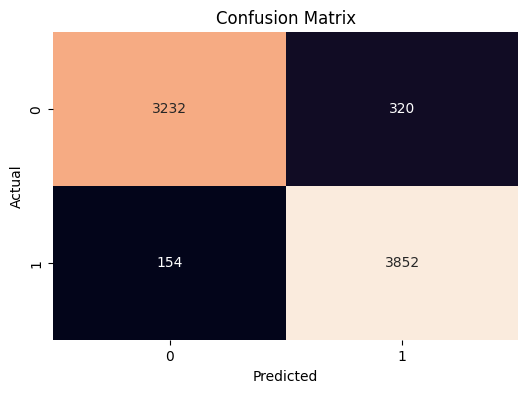

In [257]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [258]:
x_test

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
9607,1,57,5,0.0,0.000,0.0,63.0,16.0,1.0,1.0,...,0.25,0.06,255.0,66,0.26,0.020,0.00,1.0,1.0,0.0
16407,1,46,4,0.0,0.000,0.0,1.0,1.0,0.0,0.0,...,1.00,0.00,255.0,1,0.00,0.175,0.00,0.0,0.0,1.0
20995,0,13,9,8.0,8.000,0.0,1.0,8.0,0.0,0.0,...,1.00,0.00,1.0,217,1.00,0.000,0.05,0.0,0.0,0.0
17020,1,38,5,0.0,0.000,0.0,155.0,8.0,1.0,1.0,...,0.15,0.05,255.0,23,0.09,0.050,0.00,1.0,1.0,0.0
20360,2,41,9,146.0,146.000,0.0,2.0,1.0,0.0,0.0,...,0.50,0.15,255.0,1,0.00,0.175,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13302,1,46,5,0.0,0.000,0.0,245.0,12.0,1.0,1.0,...,0.05,0.06,255.0,2,0.01,0.070,0.00,1.0,1.0,0.0
25008,1,46,5,0.0,0.000,0.0,283.0,11.0,1.0,1.0,...,0.04,0.06,255.0,7,0.03,0.070,0.00,1.0,1.0,0.0
9011,1,22,9,237.0,237.000,1.0,1.0,8.0,0.0,0.0,...,1.00,0.00,56.0,255,1.00,0.000,0.05,0.0,0.0,1.0
19866,1,22,9,250.0,1325.625,1.0,9.0,9.0,0.0,0.0,...,1.00,0.00,60.0,255,1.00,0.000,0.03,0.0,0.0,0.0


#### K-Nearest Neighbors Classifier

In [260]:
from sklearn.neighbors import KNeighborsClassifier

In [261]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [262]:
y_pred = knn.predict(x_test)
y_pred

  File "C:\Users\PC\anaconda3\envs\machine\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([0, 0, 0, ..., 1, 1, 0])

In [263]:
reportknn = classification_report(y_test, y_pred)
print(reportknn)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3552
           1       0.99      0.99      0.99      4006

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [264]:
cmknn = confusion_matrix(y_test, y_pred)
cmknn

array([[3503,   49],
       [  57, 3949]], dtype=int64)

In [265]:
AccuracyKnn = accuracy_score(y_test,y_pred)
precisionKnn = precision_score(y_test,y_pred)
print("Accuracy: ", AccuracyKnn)
print("Precision: ", precisionKnn)

Accuracy:  0.9859751256946282
Precision:  0.987743871935968


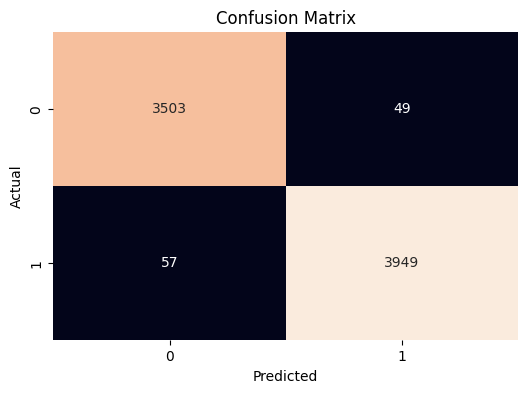

In [266]:
plt.figure(figsize=(6, 4))
sns.heatmap(cmknn, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

#### Decision-Tree Classifier

In [268]:
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [269]:
dct= DecisionTreeClassifier(random_state=21)
dct.fit(x_train,y_train)

DecisionTreeClassifier(random_state=21)

In [270]:
y_pred = dct.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [271]:
Accuracydct = accuracy_score(y_test,y_pred)
precisiondct = precision_score(y_test,y_pred)
print("Accuracy: ", Accuracydct)
print("Precision: ", precisiondct)

Accuracy:  0.9937814236570521
Precision:  0.994751312171957


In [272]:
reportdct = classification_report(y_test, y_pred)
print(reportdct)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3552
           1       0.99      0.99      0.99      4006

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [273]:
cmdct = confusion_matrix(y_test, y_pred)
cmdct

array([[3531,   21],
       [  26, 3980]], dtype=int64)

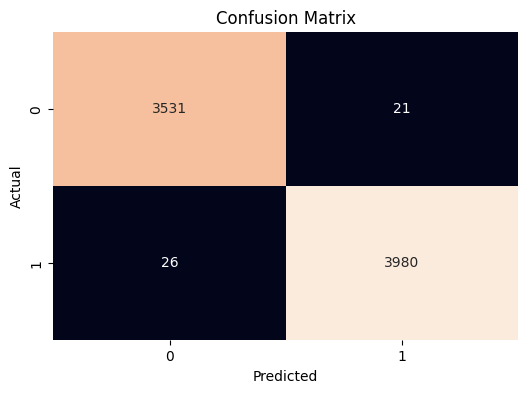

In [274]:
plt.figure(figsize=(6, 4))
sns.heatmap(cmdct, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

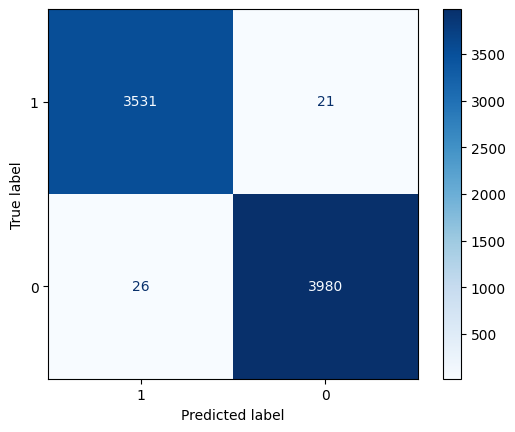

In [275]:
# plot_confusion_matrix(dt_clf, x_test, y_test)
# Compute confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = dct.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot(cmap='Blues')
plt.show()

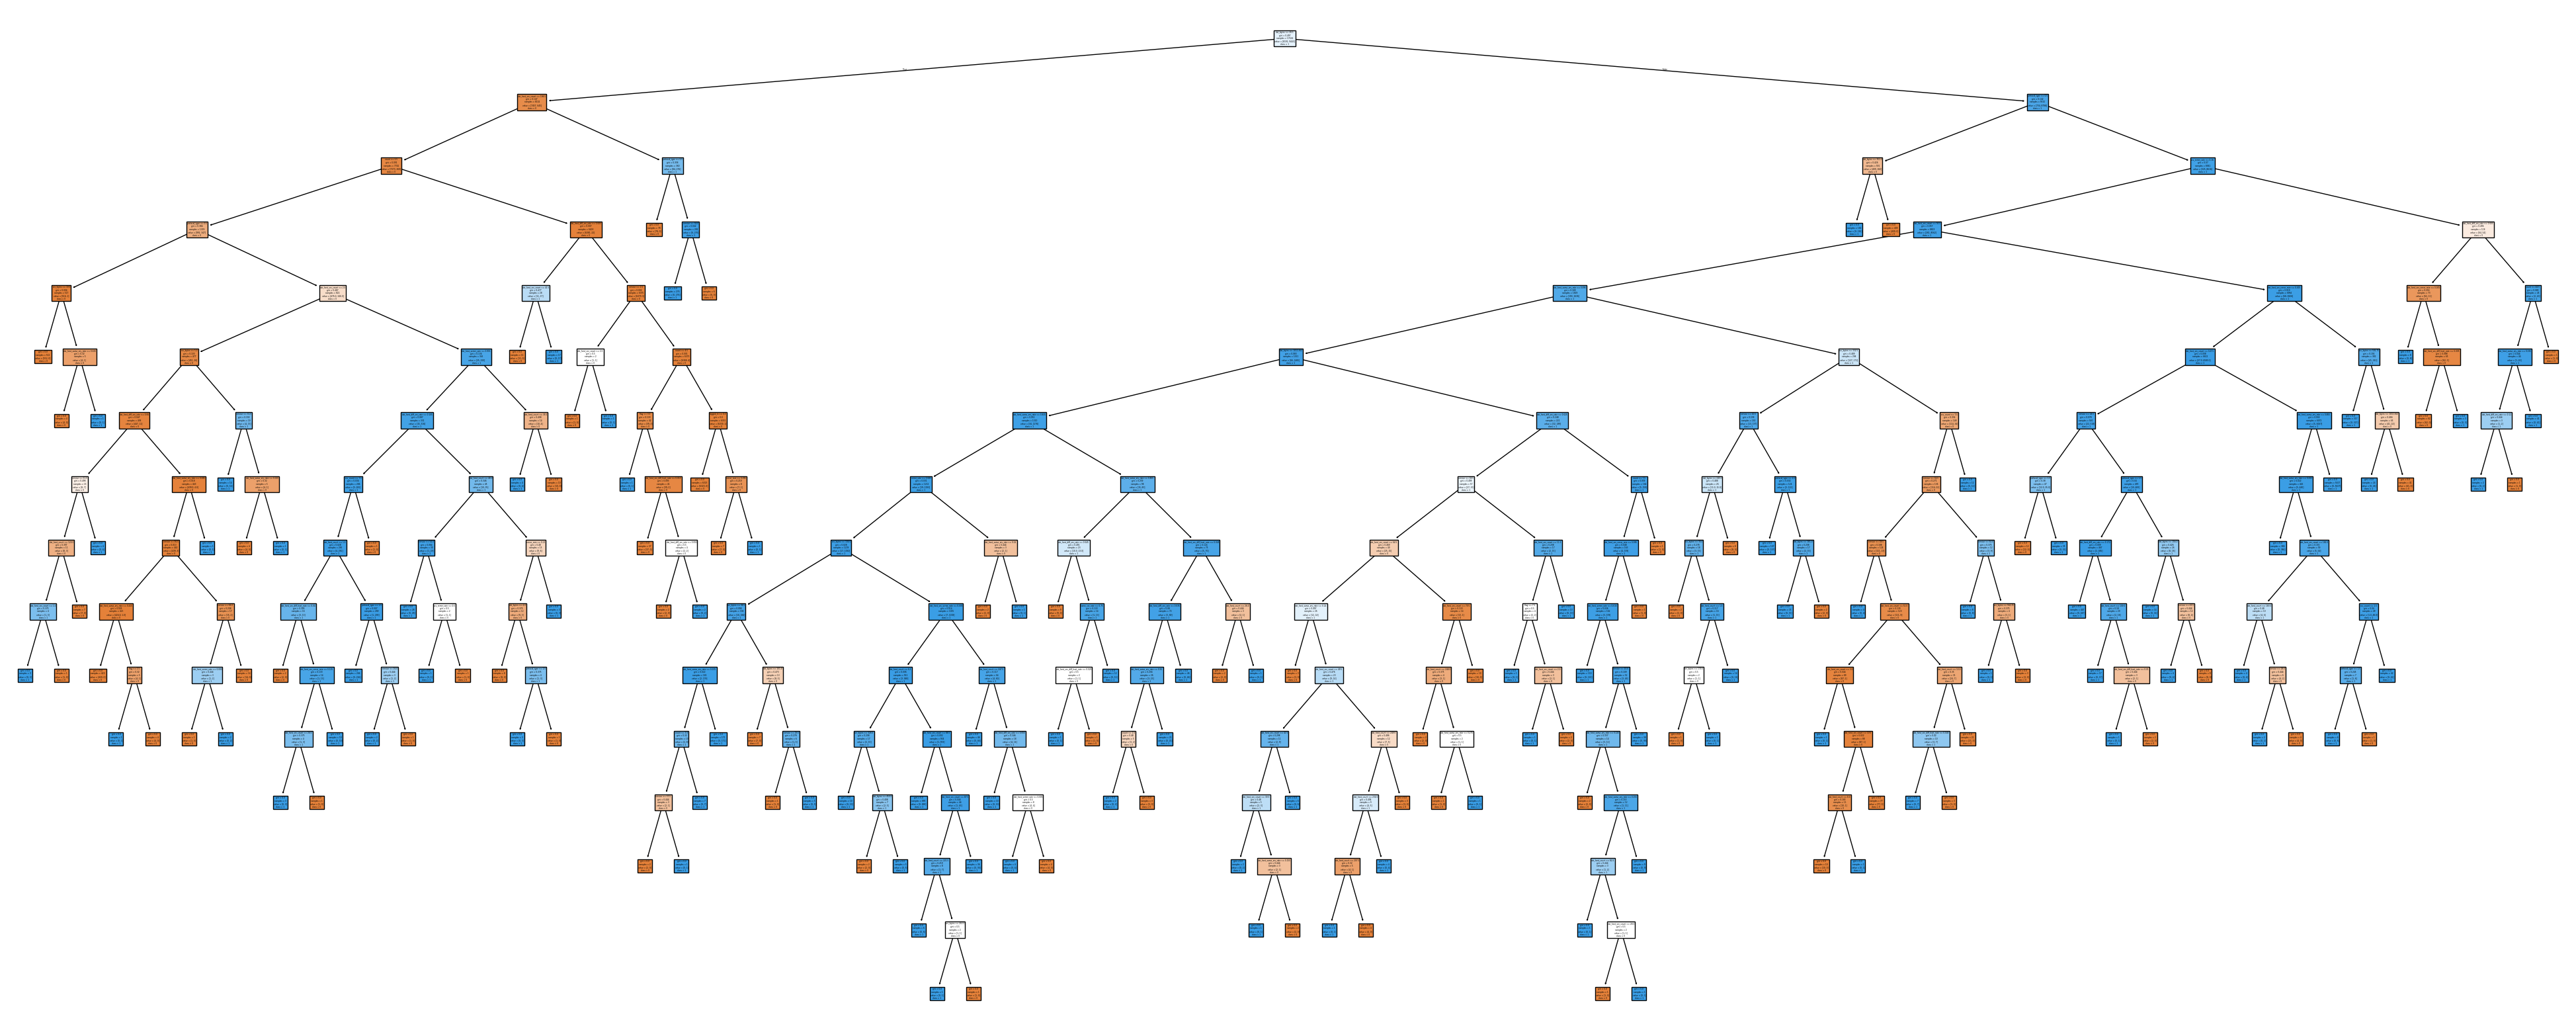

In [537]:
plt.figure(figsize=(50,20))
plot_tree(dct, feature_names=x.columns, filled=True, class_names=['0','1'])
plt.savefig('Decision_Tree.jpg', dpi = 1080)

#### Random Forest Classifier

In [278]:
from sklearn.ensemble import RandomForestClassifier

In [279]:
rfc = RandomForestClassifier(n_estimators=41, random_state=13)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=41, random_state=13)

In [280]:
y_pred = rfc.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [281]:
reportrfc = classification_report(y_test, y_pred)
print(reportrfc)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3552
           1       0.99      1.00      1.00      4006

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [282]:
cmrfc = confusion_matrix(y_test, y_pred)
cmrfc

array([[3531,   21],
       [  10, 3996]], dtype=int64)

In [283]:
Accuracyrfc = accuracy_score(y_test,y_pred)
precisionrfc = precision_score(y_test,y_pred)
print("Accuracy: ", Accuracyrfc)
print("Precision: ", precisionrfc)

Accuracy:  0.9958983858163535
Precision:  0.9947722180731889


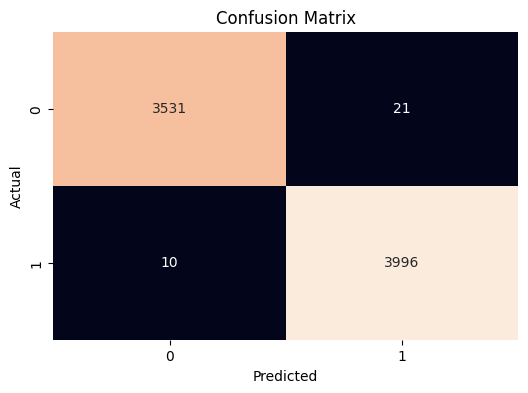

In [284]:
plt.figure(figsize=(6, 4))
sns.heatmap(cmrfc, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [285]:
test_array=x.head(1).values

In [286]:
rfc.predict(test_array)

array([1])

In [287]:
dct.predict(test_array)

array([1])

In [288]:
knn.predict(test_array)

array([1])

In [289]:
lrc.predict(test_array)

array([1])